#### Topic : This homework illustrates the working of PCA for dimensionality reduction.

##### KNN Classifier without PCA

KNN (K-Nearest Neighbors) is a type of supervised machine learning algorithm used for classification tasks. It is a non-parametric algorithm that can be used for both binary and multi-class classification. PCA (Principal Component Analysis) is a dimensionality reduction technique used to reduce the number of features in a dataset. However, KNN can also be used without applying PCA as a preprocessing step.

In [3]:
import numpy as np

class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X_train, y_train)             :
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        # Compute pairwise distances between X_test and X_train
        dists = self.compute_distances(X_test)
        # Find k nearest neighbors and their labels
        k_nearest_labels = self.y_train[np.argsort(dists)[:, :self.k]]
        # Predict the label of X_test using majority vote
        y_pred = []
        for labels in k_nearest_labels:
            y_pred.append(np.bincount(labels).argmax())
        return y_pred
    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = sum(y_pred == y_test) / len(y_test)
        return accuracy
    def compute_distances(self, X):
        # Compute pairwise distances between each sample in X and each sample in self.X_train.
        # Parameters:X (numpy array of shape (n_samples, n_features)): Samples to compute distances for.
        # Returns:dists (numpy array of shape (n_samples, n_train_samples)): Pairwise distances between each sample in X and each sample in self.X_train.
        n_samples = X.shape[0]
        n_train_samples = self.X_train.shape[0]
        dists = np.zeros((n_samples, n_train_samples))
        for i in range(n_samples):
            for j in range(n_train_samples):
                dists[i][j] = np.sqrt(np.sum(np.square(X[i] - self.X_train[j])))
        return dists

In [2]:
import pandas as pd

train_data = pd.read_csv('optdigits_train.txt')
test_data =pd.read_csv('optdigits_test.txt')

X_train = train_data.iloc[:, 0:-1].values
y_train = train_data.iloc[:, -1].values

X_test = test_data.iloc[:, 0:-1].values
y_test = test_data.iloc[:, -1].values

In [4]:
from sklearn.metrics import accuracy_score

error_rates = []
ks = [1,3,5,7]
for k in ks:
  knn = KNN(k = k)
  # Fit the KNN model to the training data
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)

  # Calculate the accuracy of the KNN model
  accuracy = accuracy_score(y_test, y_pred)

  # Calculate the error rate
  error_rate = 1 - accuracy
  error_rates.append(error_rate)
  print(f"The error rate for k={k}: {error_rate:.4f}")

The error rate for k=1: 0.0541
The error rate for k=3: 0.0405
The error rate for k=5: 0.0439
The error rate for k=7: 0.0541


##### PCA Implementation

In [7]:
import numpy as np
import pandas as pd

# Define the myPCA function
def myPCA(data, num_principal_components):
    # Center the data
    centered_data = data - np.mean(data, axis=0)

    # Compute the covariance matrix
    cov_matrix = np.cov(centered_data.T)

    # Compute the eigenvectors and eigenvalues of the covariance matrix
    eigvals, eigvecs = np.linalg.eig(cov_matrix)

    # Sort the eigenvectors in descending order of their corresponding eigenvalues
    sorted_indices = np.argsort(eigvals)[::-1]
    sorted_eigvals = eigvals[sorted_indices]
    sorted_eigvecs = eigvecs[:, sorted_indices]

    # Select the top num_principal_components eigenvectors
    principal_components = sorted_eigvecs[:, :num_principal_components]

    return principal_components, sorted_eigvals[:num_principal_components]

# Load the Optdigits dataset
optdigits_train = pd.read_csv('optdigits_train.txt')

# Apply PCA to the dataset
pcs, eigvals = myPCA(optdigits_train.iloc[:, :-1], 5)

# Print the first principal component
print("First principal component:", pcs[:, 0])

First principal component: [ 0.00000000e+00  1.75705502e-02  2.28230139e-01  1.49710553e-01
  1.73974247e-02  6.63478709e-02 -7.19332497e-03 -4.87988195e-03
  3.75471944e-04  1.22594496e-01  2.52248355e-01 -1.50368535e-01
  2.97663216e-02  1.87626391e-01 -4.13131178e-03 -6.22216946e-03
  5.83344477e-05  8.53440264e-02 -7.58571161e-02 -2.20353192e-01
  1.60701267e-01  1.41383382e-01 -3.88179481e-02 -4.96715344e-03
 -1.23249192e-04 -6.25534576e-02 -2.45794480e-01  3.74977738e-02
  1.95927523e-01  3.92507424e-02 -5.42111584e-02 -2.71894815e-04
  0.00000000e+00 -1.54518435e-01 -3.61724034e-01 -1.66000552e-01
 -1.00600915e-01 -3.15148158e-02 -1.79694261e-02  0.00000000e+00
 -1.27806527e-03 -1.01482478e-01 -2.81296790e-01 -2.52109285e-01
 -2.38225123e-01 -7.52219246e-03  5.63008132e-02 -1.71593379e-03
 -8.45346483e-04  1.06802717e-02  8.14508651e-02 -8.58305405e-02
 -1.24437113e-01  1.59641757e-01  8.83246171e-02 -1.26252035e-03
 -1.81446131e-05  1.40943205e-02  2.37525256e-01  1.51250488e-0

##### KNN Classifier with PCA

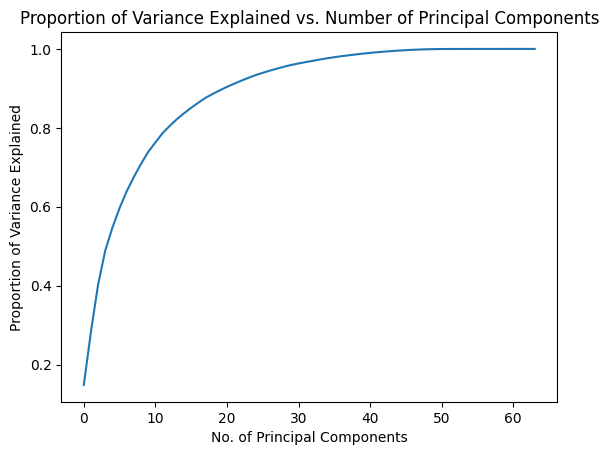

Minimum number (K) of eigenvectors/principal components that explain atleast 90% of the variance: 21
k = 1: Error rate = 0.04729730
k = 3: Error rate = 0.04729730
k = 5: Error rate = 0.05405405
k = 7: Error rate = 0.05405405


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


# Get the optimal number of principal components that explain at least 90% of the variance
# Load the Optdigits training and test sets
X_train = pd.read_csv('optdigits_train.txt')
X_test = pd.read_csv('optdigits_test.txt')
eigvals = myPCA(X_train.iloc[:, :-1], X_train.shape[1]-1)[1]
variance_ratios = eigvals / np.sum(eigvals)
cumulative_variance_ratios = np.cumsum(variance_ratios)
optimal_k = np.argmax(cumulative_variance_ratios >= 0.9) +1


# Plot the proportion of variance explained by each principal component
plt.plot(cumulative_variance_ratios)
plt.xlabel('No. of Principal Components')
plt.ylabel('Proportion of Variance Explained')
plt.title('Proportion of Variance Explained vs. Number of Principal Components')
plt.show()


# Print the optimal number of principal components
print('Minimum number (K) of eigenvectors/principal components that explain atleast 90% of the variance:', optimal_k)

# Project the training and test sets to the optimal number of principal components
pcs, _ = myPCA(X_train.iloc[:, :-1], optimal_k)
X_train_pca = np.dot(X_train.iloc[:, :-1], pcs)
X_test_pca = np.dot(X_test.iloc[:, :-1], pcs)
y_train = np.array(X_train.iloc[:, -1])
y_test = np.array(X_test.iloc[:, -1])

# Define the KNN classifier with k=1,3,5,7
k_values = [1, 3, 5, 7]
for k in k_values:
    knn = KNN(k=k)
    knn.fit(X_train_pca, y_train)
    accuracy = knn.evaluate(X_test_pca, y_test)
    print(f"k = {k}: Error rate = {1-accuracy:.8f}")


##### Component Plotting

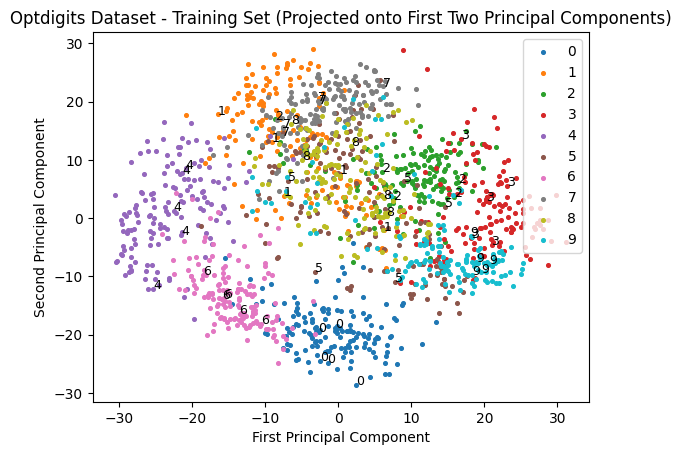

In [9]:
import matplotlib.pyplot as plt

# Apply PCA to the dataset and project onto the first two principal components
pcs, _ = myPCA(X_train.iloc[:, :-1], 2)
optdigits_train_pca = np.dot(X_train.iloc[:, :-1], pcs)
optdigits_test_pca = np.dot(X_test.iloc[:, :-1], pcs)

# Define the color map for the digits
cmap = plt.get_cmap('tab10')

# Create a scatter plot of the projected training data
for digit in range(10):
    plt.scatter(optdigits_train_pca[X_train.iloc[:, -1] == digit, 0], 
                optdigits_train_pca[X_train.iloc[:, -1] == digit, 1],
                color=cmap(digit), label=str(digit), s=7)
    indices = np.random.choice(np.where(X_train.iloc[:, -1] == digit)[0], size=5, replace=False)
    for i in indices:
        if X_train.iloc[i,-1] == digit:
            plt.text(optdigits_train_pca[i,0], optdigits_train_pca[i,1], str(digit), color='black',fontsize=9)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Optdigits Dataset - Training Set (Projected onto First Two Principal Components)')
plt.legend()
plt.show()

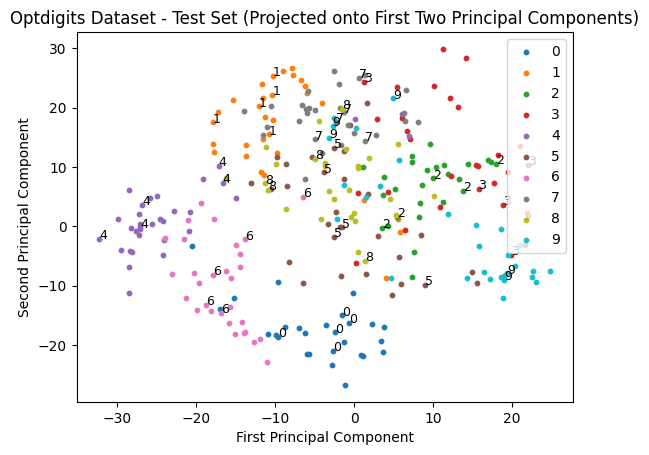

In [12]:
# Create a scatter plot of the projected test data
for digit in range(10):
    plt.scatter(optdigits_test_pca[X_test.iloc[:, -1] == digit, 0], 
                optdigits_test_pca[X_test.iloc[:, -1] == digit, 1],
                color=cmap(digit), label=str(digit), s=10)
    indices = np.random.choice(np.where(X_test.iloc[:, -1] == digit)[0], size=5, replace=False)
    for i in indices:
        if X_test.iloc[i,-1] == digit:
            plt.text(optdigits_test_pca[i,0], optdigits_test_pca[i,1], str(digit), color='black',fontsize=9)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Optdigits Dataset - Test Set (Projected onto First Two Principal Components)')
plt.legend()
plt.show()